In [53]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns
sns.set()

In [54]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

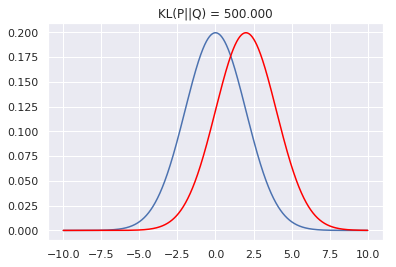

In [55]:
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)

plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))

plt.plot(x, p)
plt.plot(x, q, c='red')

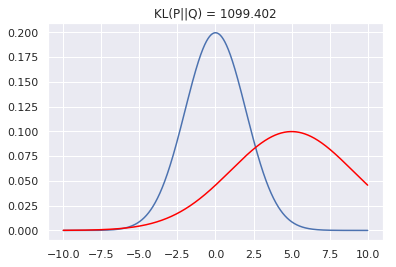

In [56]:
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 5, 4)

plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))

plt.plot(x, p)
plt.plot(x, q, c='red')

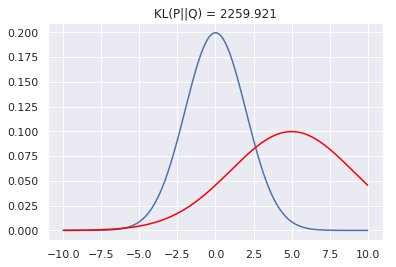

In [57]:
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 5, 4)

plt.title('KL(P||Q) = %1.3f' % kl_divergence(q, p))

plt.plot(x, p)
plt.plot(x, q, c='red')

In [35]:
x = np.arange(-10, 10, 0.001)
p_pdf = norm.pdf(x, 0, 2).reshape(1, -1)
np.random.seed(0)
random_mean = np.random.randint(10, size=1)
random_sigma = np.random.randint(10, size=1)
random_pdf = norm.pdf(x, random_mean, random_sigma).reshape(1, -1)

In [36]:
learning_rate = 0.001
epochs = 100

In [37]:
p = tf.placeholder(tf.float64, shape=pdf.shape)
mu = tf.Variable(np.zeros(1))
sigma = tf.Variable(np.eye(1))
normal = tf.exp(-tf.square(x - mu) / (2 * sigma))
q = normal / tf.reduce_sum(normal)

In [49]:
kl_divergence = tf.reduce_sum(
    tf.where(p == 0, tf.zeros(pdf.shape, tf.float64), p * tf.log(p / q))
)

In [50]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(kl_divergence)

In [51]:
init = tf.global_variables_initializer()

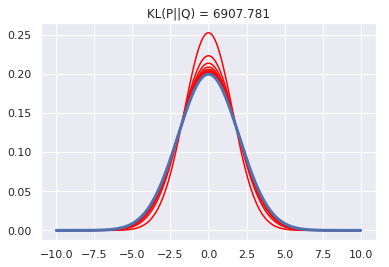

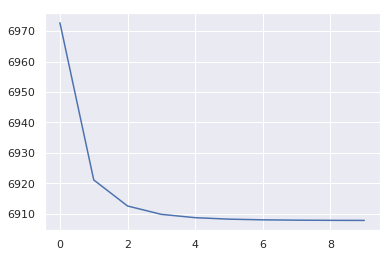

[6972.748669153857, 6921.089291784218, 6912.519307868832, 6909.770074072478, 6908.679423183633, 6908.198586077165, 6907.973214609767, 6907.863437010273, 6907.808590411412, 6907.780711323989]


In [52]:
with tf.Session() as sess:
    sess.run(init)
    
    history = []
    means = []
    variances = []
    
    for i in range(epochs):
        sess.run(optimizer, { p: pdf })
        
        if i % 10 == 0:
            history.append(sess.run(kl_divergence, { p: pdf }))
            means.append(sess.run(mu)[0])
            variances.append(sess.run(sigma)[0][0])
    
    for mean, variance in zip(means, variances):
        q_pdf = norm.pdf(x, mean, np.sqrt(variance))
        plt.plot(x, q_pdf.reshape(-1, 1), c='red')

    plt.title('KL(P||Q) = %1.3f' % history[-1])
    plt.plot(x, p_pdf.reshape(-1, 1), linewidth=3)
    plt.show()
    
    plt.plot(history)
    plt.show()
    
    sess.close()